##**Brazilian Demographic Landscape - 1960-2010**

_Objective:_
Exploratory analysis and data visualization over brazilian population time series data.

_Data Source:_
IBGE


In [2]:
#import pandas and load raw data file (extracted from IBGE)
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
pop_data = pd.read_csv (r"historical_series.xls", sep="\t")
pop_data.head()

,UF,1872,1890,1900,1920,1940,1950,1960,1970,1980,1991,2000,2010
0,Rondonia,-,-,-,-,-,36935,70783,116620,503125,1130874,1377792,1562409
1,Acre,-,-,-,92379,79768,114755,160208,218006,306893,417165,557226,733559
2,Amazonas,57610,147915,249756,363166,438008,514099,721215,960934,1449135,2102901,2813085,3483985
3,Roraima,-,-,-,-,-,18116,29489,41638,82018,215950,324152,450479
4,Para,275237,328455,445356,983507,944644,1123273,1550935,2197072,3507312,5181570,6189550,7581051


In [3]:
#set missing values as NaN, set column headers as integers
pop_data.replace("-", pd.NA, inplace=True)
for col in pop_data.columns:
    if col != "UF":
        pop_data[col] = pd.to_numeric(pop_data[col], errors="coerce")

In [4]:
# use UF as index labels
# calculate absolute and relative growth
pop_data["absolute_growth"], pop_data["relative_growth"] = "", ""
pop_data["absolute_growth"] = pop_data["2010"] - pop_data["1960"]
pop_data["relative_growth"] = pop_data["2010"]/pop_data["1960"] * 100
pop_data.sort_values(by="UF", inplace=True)


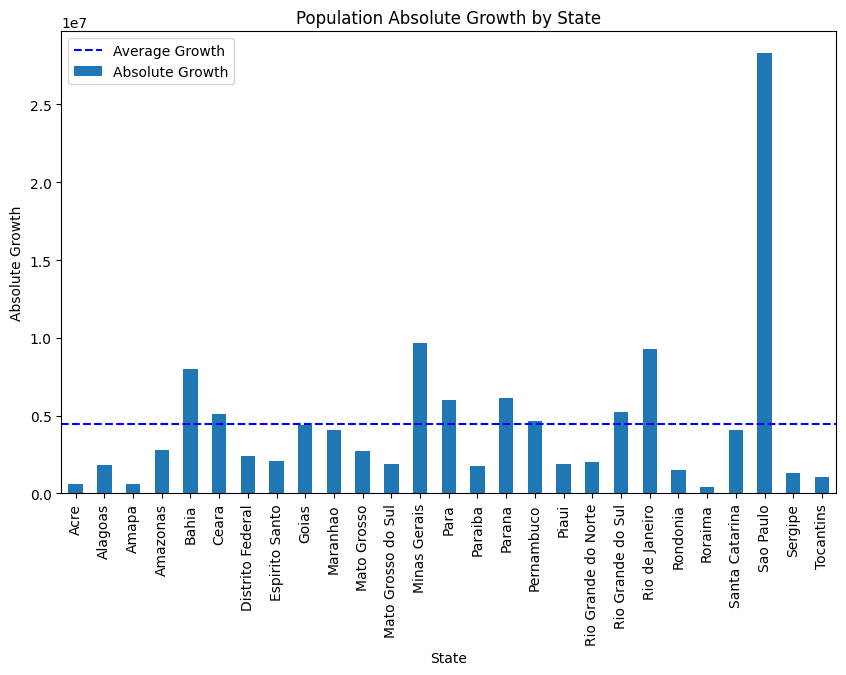

In [8]:
# plot absolute growth per state chart
absolute_growth_chart = pop_data.plot(kind="bar", x="UF", y="absolute_growth", legend=False, figsize=(10, 6),title="Population Absolute Growth by State", label="Absolute Growth")
absolute_growth_chart.set_xlabel("State")
absolute_growth_chart.set_ylabel("Absolute Growth")
absolute_growth_chart.tick_params(axis="x", labelsize=10, rotation=90)
avg_growth = pop_data["absolute_growth"].mean()
absolute_growth_chart.axhline(y=avg_growth, color="b", linestyle="--", label="Average Growth")
absolute_growth_chart.legend()
plt.show()

In [9]:
# transpose data for next visualization
pop_transposed = pop_data.set_index(pop_data["UF"]).drop(columns=["UF","absolute_growth","relative_growth"]).transpose()

<Axes: title={'center': 'Population over Time'}>

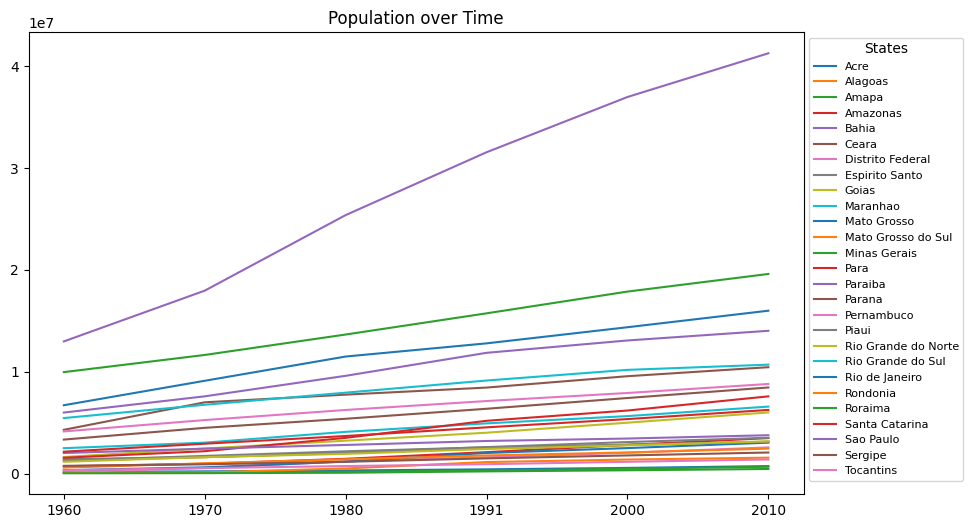

In [10]:
# plot timeseries chart for all states
trend_chart = pop_transposed.plot(kind="line", figsize=(10, 6),title="Population over Time", label="Population per State")
trend_chart.legend(title="States", bbox_to_anchor=(1,1), fontsize="8")
trend_chart

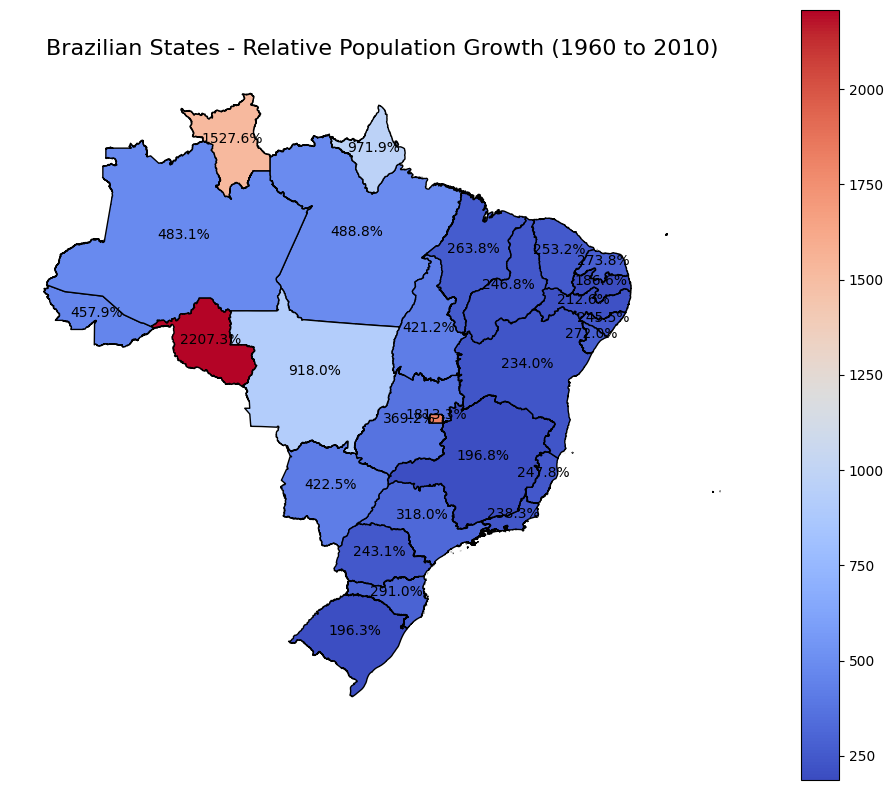

In [19]:
# clean special characters
# merge data to .SHP
# plot geopandas heatmap
states_geo = gpd.read_file(r"C:\Users\Lenovo\Desktop\Giovanni\PythonProjects\Data Analysis\\brazil-demographics\data\BR_UF_2024\BR_UF_2024.shp")
for old, new in [("á", "a"), ("à", "a"), ("ã", "a"), ("â", "a"),
                 ("é", "e"), ("ê", "e"),
                 ("í", "i"),
                 ("ó", "o"), ("ô", "o"), ("õ", "o"),
                 ("ú", "u"),
                 ("ç", "c")]:
    states_geo["NM_UF"] = states_geo["NM_UF"].str.replace(old, new)

merged = states_geo.merge(pop_data, left_on="NM_UF", right_on="UF")
map_plot = merged.plot(column="relative_growth", cmap="coolwarm", legend=True, figsize=(12, 10), edgecolor="black")
map_plot.set_axis_off()
map_plot.set_title("Brazilian States - Relative Population Growth (1960 to 2010)", fontsize=16)
for idx, row in merged.iterrows():
    plt.annotate(
        text=f"{row['relative_growth']:.1f}%",  # formatted to 1 decimal place
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha='center',
        fontsize=10,
        color='black'
    )